<a href="https://colab.research.google.com/github/muhammadfawad538/AI-ML--supervised-unspervised/blob/main/Students'_Depression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Depression.csv', usecols=['Gender','Age','CGPA','Family Problem','Social Support','Demographics','Depression'])
data.head(10)

,Family Problem,Social Support,Age,Gender,Demographics,CGPA,Depression
0,No,High,38,Male,Rural,Moderate,0
1,No,High,51,Male,Urban,High,0
2,Yes,Moderate,32,Female,Urban,High,0
3,No,High,64,Female,Rural,Moderate,0
4,Yes,Low,31,Male,Rural,Moderate,0
5,Yes,Moderate,38,Male,Urban,Moderate,0
6,Yes,Low,63,Female,Urban,Low,0
7,No,Moderate,46,Male,Rural,High,0
8,Yes,High,21,Male,Rural,Moderate,0
9,No,Low,22,Female,Rural,High,0


In [ ]:
data.columns

Index(['Family Problem', 'Social Support', 'Age', 'Gender', 'Demographics',
       'CGPA', 'Depression'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Family Problem  100000 non-null  object
 1   Social Support  100000 non-null  object
 2   Age             100000 non-null  int64 
 3   Gender          100000 non-null  object
 4   Demographics    100000 non-null  object
 5   CGPA            100000 non-null  object
 6   Depression      100000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [ ]:
data.describe()

,Age,Depression
count,100000.000000,100000.00000
mean,41.454300,0.04285
std,13.839204,0.20252
min,18.000000,0.00000
25%,29.000000,0.00000
50%,41.000000,0.00000
75%,53.000000,0.00000
max,65.000000,1.00000


In [ ]:
data.isnull().sum()

,0
Family Problem,0
Social Support,0
Age,0
Gender,0
Demographics,0
CGPA,0
Depression,0


In [ ]:
data.shape


(100000, 7)

In [ ]:
data.size

700000

# Data Preprocessing

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.size

37688

In [ ]:
data.shape

(5384, 7)

In [ ]:
data['Family Problem'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Family Problem (binary)
data['Family Problem'] = data['Family Problem'].map({'Yes': 1, 'No': 0})

In [ ]:
data['Social Support'].unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [ ]:
# Family Problem (binary)
data['Social Support'] = data['Social Support'].map({'Low':0, 'Moderate':1, 'High': 2})

In [ ]:
# Convert gender
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
data['Demographics'].unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
data['Demographics'] = data['Demographics'].map({'Urban': 1, 'Rural': 0})

In [ ]:
data['CGPA'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [ ]:
data['CGPA'] = data['CGPA'].map({'Low':0, 'Moderate':1, 'High': 2})

In [ ]:
data.sample(5)

,Family Problem,Social Support,Age,Gender,Demographics,CGPA,Depression
1163,1,0,56,1,0,0,0
88775,0,1,59,1,0,0,1
542,0,0,48,0,1,2,0
17582,0,2,42,0,0,2,0
674,1,0,20,0,0,2,0


Text(0.5, 1.0, 'Depression Distribution')

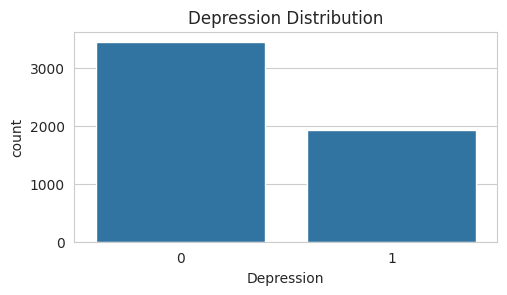

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
# Target variable distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Depression', data=data)
plt.title('Depression Distribution')

Text(0.5, 1.0, 'Age Distribution')

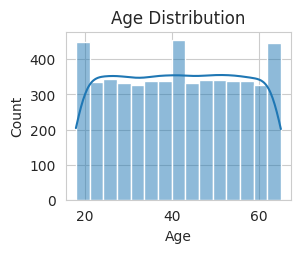

In [ ]:
# Age distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Age'], bins=15, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Social Support vs Depression')

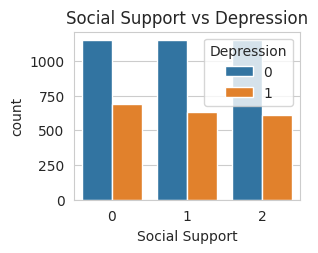

In [ ]:
# Social Support vs Depression
plt.subplot(2, 2, 3)
sns.countplot(x='Social Support', hue='Depression', data=data)
plt.title('Social Support vs Depression')

Text(0.5, 1.0, 'Gender vs Depression')

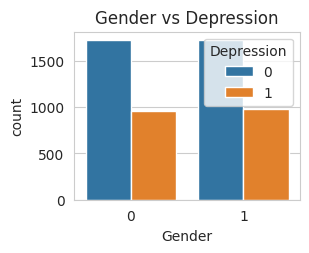

In [ ]:
# Social Support vs Depression
plt.subplot(2, 2, 3)
sns.countplot(x='Gender', hue='Depression', data=data)
plt.title('Gender vs Depression')

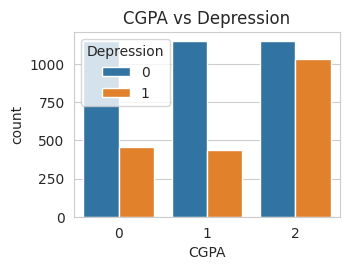

In [ ]:
# CGPA distribution
plt.subplot(2, 2, 4)
sns.countplot(x='CGPA', hue='Depression', data=data)
plt.title('CGPA vs Depression')
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for modeling
X = data.drop('Depression', axis=1)
y = data['Depression']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
# Scale only numerical features (Age in this case)
X_train_scaled['Age'] = scaler.fit_transform(X_train[['Age']])
X_test_scaled['Age'] = scaler.transform(X_test[['Age']])

In [ ]:
X

,Family Problem,Social Support,Age,Gender,Demographics,CGPA
0,0,2,38,1,0,1
1,0,2,51,1,1,2
2,1,1,32,0,1,2
3,0,2,64,0,0,1
4,1,0,31,1,0,1
...,...,...,...,...,...,...
99094,0,2,20,1,1,2
99210,1,2,52,0,0,1
99296,0,1,31,1,0,1
99549,0,2,41,1,1,2


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Confusion Matrix
A confusion matrix is a tabular summary of classification results showing counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) .
Rows represent actual classes, while columns represent predicted classes, making it easy to see which classes are confused by the model.
Visualizing the confusion matrix can reveal specific error patterns and guide further model refinement.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm


array([[1034,    3],
       [ 575,    4]])

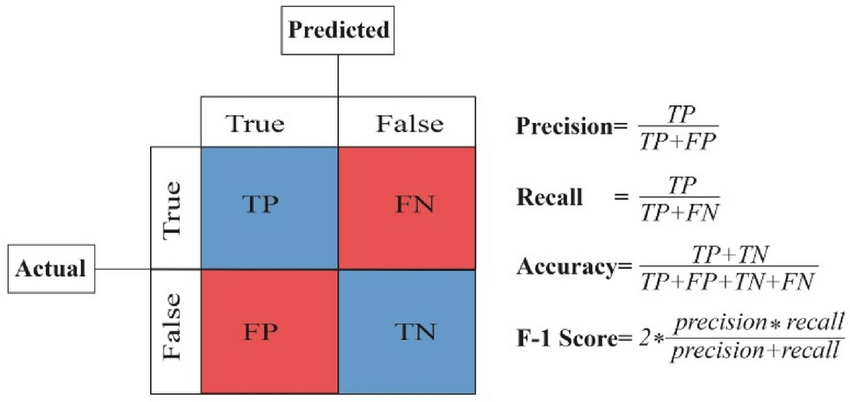

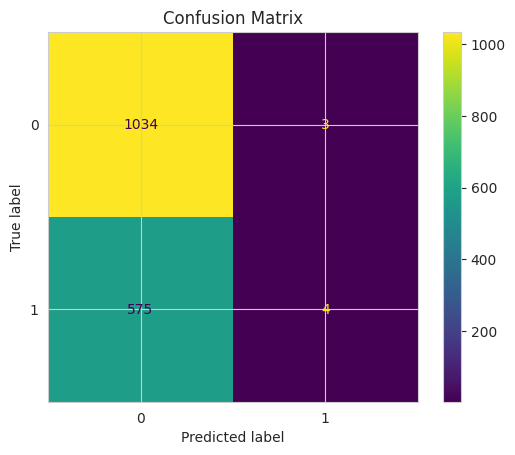

In [ ]:
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X_test)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


# Accuracy measures the proportion of correct predictions over all predictions made


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6423267326732673


# Precision is the ratio of true positives to the sum of true positives and false positives, indicating the model’s ability to avoid false alarms

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


Precision: 0.6171224143190311


# Recall (sensitivity) is the ratio of true positives to the sum of true positives and false negatives, reflecting the model’s ability to identify all positive instances

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


Recall: 0.6423267326732673


# F1-Score is the harmonic mean of precision and recall, balancing these two metrics into a single performance measure

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)


F1-Score: 0.5064227200621667


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

Test Set Metrics:
Accuracy: 0.6423
Precision: 0.5714
Recall: 0.0069
F1-Score: 0.0137



In [ ]:
from sklearn.metrics import classification_report

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1037
           1       0.57      0.01      0.01       579

    accuracy                           0.64      1616
   macro avg       0.61      0.50      0.40      1616
weighted avg       0.62      0.64      0.51      1616

